<a href="https://colab.research.google.com/github/DayShad0w/py_DataScience/blob/CourseWork/HW_5_%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курсовая работа Егорова Юлия

Анализ данных по заработной плате за 2020-2022 годы в области кибербезопасности (в основном US)

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [505]:
data = pd.read_csv('salaries_cyber.csv')

In [506]:
data.describe

<bound method NDFrame.describe of       work_year experience_level employment_type  \
0          2022               EN              FT   
1          2022               MI              FT   
2          2022               MI              FT   
3          2022               MI              FT   
4          2022               EN              CT   
...         ...              ...             ...   
1242       2020               MI              FT   
1243       2021               SE              FT   
1244       2021               SE              FT   
1245       2021               MI              FT   
1246       2021               MI              FT   

                         job_title  salary salary_currency  salary_in_usd  \
0            Cyber Program Manager   63000             USD          63000   
1                 Security Analyst   95000             USD          95000   
2                 Security Analyst   70000             USD          70000   
3              IT Security Analys

In [507]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


In [508]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
5,2022,EX,FT,Application Security Architect,315000,USD,315000,US,100,US,L
6,2022,SE,FT,Security Researcher,220000,USD,220000,US,100,US,M
7,2022,SE,FT,Security Researcher,140000,USD,140000,US,100,US,M
8,2021,MI,FT,Information Security Compliance Analyst,55000,GBP,75650,GB,50,GB,L
9,2022,EX,FT,Information Security Compliance Manager,360000,USD,360000,TW,100,SG,L


In [509]:
#data['company_location'] = data['company_location'].astype(pd.StringDtype())
#data['employee_residence'] = data['employee_residence'].astype(pd.StringDtype())

In [510]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### Анализ данных

In [511]:
df = pd.DataFrame(data)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [512]:
df.isnull().values.any()

False

In [513]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

В dataset имеем множество текстовых и объектных данных, которые имеет смысл заменить на числовые для анализа. Получим количества значений по каждой строковой и объектной колонке, выберем данные для включения в анализ.

In [514]:
df['employment_type'].value_counts()

FT    1225
CT      11
PT       8
FL       3
Name: employment_type, dtype: int64

In [515]:
df['experience_level'].value_counts()

SE    547
MI    412
EN    215
EX     73
Name: experience_level, dtype: int64

Расшифровка значения:
1 EN - Entry Level, Junior
2 MI - Middle
3 SE - Senior
4 EX - Executive level, Director

In [516]:
df['job_title'].value_counts() 

Security Engineer                          194
Cyber Security Analyst                     133
Penetration Tester                          70
Information Security Manager                64
Cyber Security Engineer                     63
                                          ... 
Principal Application Security Engineer      1
Application Security Specialist              1
Information Security Compliance Analyst      1
Application Security Architect               1
Concierge Security Engineer                  1
Name: job_title, Length: 87, dtype: int64

In [517]:
len(df['job_title'].unique())

87

In [518]:
df['employee_residence'].value_counts()  

US    859
GB     57
CA     55
DE     35
IN     30
AU     22
FR     22
NL     13
BR     13
CH     12
ES     12
PT     11
IT      8
IE      6
GR      6
PL      5
NZ      5
RO      4
SE      4
DK      4
SI      4
AR      4
SG      3
AF      3
AE      3
BE      3
ZA      3
BG      2
EE      2
AT      2
JP      2
RU      2
HU      2
IL      2
TW      2
DZ      2
PK      2
IR      1
BW      1
LT      1
SA      1
VN      1
EG      1
LU      1
CL      1
GH      1
AZ      1
MX      1
KE      1
KG      1
ID      1
CZ      1
NO      1
NG      1
HR      1
ET      1
CR      1
TR      1
Name: employee_residence, dtype: int64

In [519]:
len(df['employee_residence'].unique())

58

In [520]:
df['company_size'].value_counts() 

L    774
M    384
S     89
Name: company_size, dtype: int64

Заменим уровень специалиста с текстового на цифровое значение

In [521]:
df['experience_level'] = df['experience_level'].replace({'EN':1, 'MI':2, 'SE':3, 'EX':4})

Далее проработаем колонку с типом занятости.
PT - part-time
FT - full-time
CT - contract
FL - freelance
Значения, полученные при анализе
FT 1225 CT 11 PT 8 FL 3
Примем, что FL (freelance) это частичная занятость, так как сотрудники редко работают только на одну компанию при таком варианте.
Аналогично CT - это работа на полную ставку, но ограниченно во времени (выберем такой вариант).
Заменим CT FL на аналогичные значения и пронумеруем FT - 1, PT - 2

In [522]:
df['employment_type'] = df['employment_type'].replace({'PT':2, 'FT':1, 'CT':1, 'FL':2})

In [523]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,1,1,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,2,1,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,2,1,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,2,1,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,1,1,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S


В dataset имеются как неприведенные к единому знаменателю значения заработной платы (в разных валютах), так и приведенные к USD. Проверим, какие локальные валюты указаны в принципе в dataset

In [524]:
len(df['salary_currency'].unique())

21

In [525]:
df['salary_currency'].value_counts()

USD    934
EUR    127
GBP     56
CAD     39
INR     23
AUD     18
BRL     12
CHF      9
NZD      5
PLN      4
DKK      4
ZAR      3
SEK      3
ILS      2
SGD      2
NOK      1
IDR      1
MXN      1
HUF      1
TWD      1
RUB      1
Name: salary_currency, dtype: int64

ТОП-3 валюты либо USD, базовая валюта для моделирования, либо EUR и GBP - валюты, зависящие от курса доллара почти константно (не рассматриваем периодические флуктуации относительных курсов данных валют из-за реакции фондовых рынков). Значение ЗП в региональной валюте можно исключить

In [526]:
del df['salary']
del df['salary_currency']

In [527]:
df['company_size'] = df['company_size'].replace({'S':1, 'M':2, 'L':3})

In [528]:
df['remote_ratio'] = df['remote_ratio'].replace({100:3, 50:2, 0:1})

In [529]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,1,1,Cyber Program Manager,63000,US,2,US,1
1,2022,2,1,Security Analyst,95000,US,1,US,2
2,2022,2,1,Security Analyst,70000,US,1,US,2
3,2022,2,1,IT Security Analyst,48853,BR,2,BR,3
4,2022,1,1,Cyber Security Analyst,120000,BW,3,BW,1
...,...,...,...,...,...,...,...,...,...
1242,2020,2,1,Cyber Security Analyst,96422,AU,2,AU,2
1243,2021,3,1,Information Security Manager,82528,GB,2,GB,3
1244,2021,3,1,Penetration Testing Engineer,126000,US,3,US,3
1245,2021,2,1,Information Security Analyst,57769,GB,3,GB,3


In [530]:
abs(df.corr()['salary_in_usd']).sort_values(ascending=False)

salary_in_usd       1.000000
experience_level    0.508281
work_year           0.184246
remote_ratio        0.174523
employment_type     0.080844
company_size        0.069485
Name: salary_in_usd, dtype: float64

<Figure size 864x288 with 0 Axes>

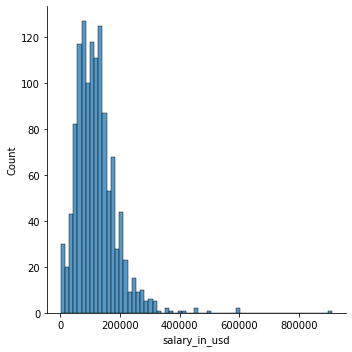

In [531]:
def _distplot(columns):
    for col in columns:
        plt.figure(figsize=(12,4))
        sns.displot(df[col])
        plt.show()
_distplot(['salary_in_usd'])

По графику видим наличие высоких заработных плат при превышении суммы примерно в 300 тысяч. Данные являются выбросами и от них необходимо избавиться

In [532]:
from heapq import nlargest
res = nlargest(20, df['salary_in_usd'])
res

[910991,
 600000,
 600000,
 500000,
 456621,
 450000,
 410000,
 400000,
 375000,
 360000,
 360000,
 325000,
 320000,
 320000,
 315000,
 310000,
 310000,
 305000,
 300000,
 300000]

In [533]:
mn = df['salary_in_usd'].min()
mn

2000

In [534]:
line = df.quantile(.97)
df1 = df[(df['salary_in_usd']<line['salary_in_usd'])]

In [535]:
df1.shape

(1209, 9)

In [536]:
df1

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,1,1,Cyber Program Manager,63000,US,2,US,1
1,2022,2,1,Security Analyst,95000,US,1,US,2
2,2022,2,1,Security Analyst,70000,US,1,US,2
3,2022,2,1,IT Security Analyst,48853,BR,2,BR,3
4,2022,1,1,Cyber Security Analyst,120000,BW,3,BW,1
...,...,...,...,...,...,...,...,...,...
1242,2020,2,1,Cyber Security Analyst,96422,AU,2,AU,2
1243,2021,3,1,Information Security Manager,82528,GB,2,GB,3
1244,2021,3,1,Penetration Testing Engineer,126000,US,3,US,3
1245,2021,2,1,Information Security Analyst,57769,GB,3,GB,3


In [537]:
line

work_year             2022.0
experience_level         4.0
employment_type          1.0
salary_in_usd       264860.8
remote_ratio             3.0
company_size             3.0
Name: 0.97, dtype: float64

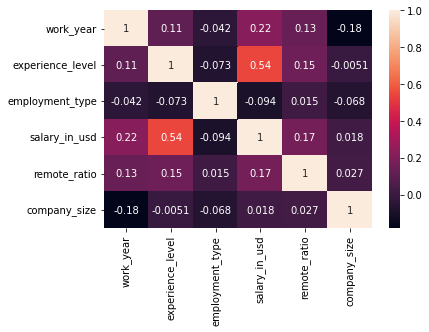

In [538]:
sns.heatmap(df1.corr(), annot=True)


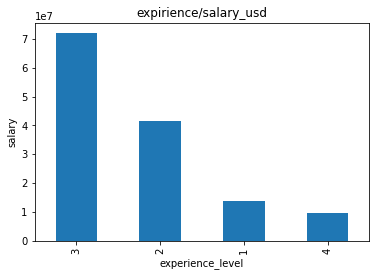

In [539]:
plt.title('expirience/salary_usd')
plt.ylabel('salary')
df1.groupby('experience_level')['salary_in_usd'].sum().sort_values(ascending=False).plot(kind ='bar')

In [540]:
df2 = pd.get_dummies(df1)
df2

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,job_title_Application Security Analyst,job_title_Application Security Engineer,job_title_Application Security Specialist,job_title_Azure Security Engineer,...,company_location_SA,company_location_SE,company_location_SG,company_location_SI,company_location_TR,company_location_TW,company_location_UM,company_location_US,company_location_VN,company_location_ZA
0,2022,1,1,63000,2,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2022,2,1,95000,1,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2022,2,1,70000,1,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2022,2,1,48853,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,1,1,120000,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,2,1,96422,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1243,2021,3,1,82528,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1244,2021,3,1,126000,3,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1245,2021,2,1,57769,3,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Подготовка данных к построению модели

В dataset присутствует множество признаков. Деление на train и test может плохо сказаться на качестве модели

In [541]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [542]:
X = df2.drop(['salary_in_usd'], axis=1)
Y = df2['salary_in_usd']

In [543]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1088, 204), (121, 204), (1088,), (121,))

Разбиение на 90/10 объясняется тем, что в dataset множество признаков и для более качественной тренировки необходимо, чтобы в выборку train  попало как можно больше различных данных.

In [544]:
r_score=[]
mse=[]
mae=[]
names=[]
r_score_test=[]
mse_test=[]
mae_test=[]

### Модель Random forest

In [545]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
names.append('Random forest')

In [546]:
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [547]:
y_pred = model.predict(X)
y_pred.shape

(1209,)

In [548]:
y_test_pred = model.predict(X_test)
y_test_pred.shape

(121,)

In [549]:
r2_score_rf = r2_score(Y, y_pred)
r_score.append(round(r2_score(Y, y_pred), 3))
# r2_score_2

In [550]:
r2_score_rf_test = r2_score(Y_test, y_test_pred)
r_score_test.append(round(r2_score(Y_test, y_test_pred), 3))

In [551]:
#mean_squared_error(Y, y_pred)**.5
mse.append(mean_squared_error(Y, y_pred)**.5)

In [552]:
mse_test.append(mean_squared_error(Y_test, y_test_pred)**.5)

In [553]:
mae.append(mean_absolute_error(Y,y_pred))

In [554]:
mae_test.append(mean_absolute_error(Y_test, y_test_pred))

In [555]:
res = pd.DataFrame(columns = ['R2', 'MSE', 'MAE', 'R2_test', 'MSE_test', 'MAE_test'], index=names)
res.R2 = r_score
res.MSE = mse
res.MAE = mae
res.R2_test = r_score_test
res.MSE_test = mse_test
res.MAE_test = mae_test
res

,R2,MSE,MAE,R2_test,MSE_test,MAE_test
Random forest,0.74,27432.595909,20852.498831,0.612,31532.090239,23582.456088


Вывод: на ограниченной выборке модель показала себя приемлемо, но для более качественного анализа необходимо больше данных. Линейная регрессия с данной задачей не справилась, R2 получился отрицательным. Увеличение max_depth приведет к более качественному обучению модели, но на тестовой выборке покажет примерно такой же результат.